<a href="https://colab.research.google.com/github/diaz-iranian/Flutter-News-Apps/blob/master/Global_SuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_excel("Global Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


Exploratory Data **Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null datetime64[ns]
Ship Date         51290 non-null datetime64[ns]
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null fl

In [6]:
df.shape

(51290, 24)

In [7]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00,9994.00,51290.00,51290.00,51290.00,51290.00,51290.00
mean,25645.50,55190.38,246.49,3.48,0.14,28.61,26.38
std,14806.29,32063.69,487.57,2.28,0.21,174.34,57.30
min,1.00,1040.00,0.44,1.00,0.00,-6599.98,0.00
25%,12823.25,23223.00,30.76,2.00,0.00,0.00,2.61
50%,25645.50,56430.50,85.05,3.00,0.00,9.24,7.79
75%,38467.75,90008.00,251.05,5.00,0.20,36.81,24.45
max,51290.00,99301.00,22638.48,14.00,0.85,8399.98,933.57


In [8]:
for column in df.columns:
  print(f"{column}: Number of unique values {df[column].nunique()}")

Row ID: Number of unique values 51290
Order ID: Number of unique values 25035
Order Date: Number of unique values 1430
Ship Date: Number of unique values 1464
Ship Mode: Number of unique values 4
Customer ID: Number of unique values 1590
Customer Name: Number of unique values 795
Segment: Number of unique values 3
City: Number of unique values 3636
State: Number of unique values 1094
Country: Number of unique values 147
Postal Code: Number of unique values 631
Market: Number of unique values 7
Region: Number of unique values 13
Product ID: Number of unique values 10292
Category: Number of unique values 3
Sub-Category: Number of unique values 17
Product Name: Number of unique values 3788
Sales: Number of unique values 27200
Quantity: Number of unique values 14
Discount: Number of unique values 29
Profit: Number of unique values 28234
Shipping Cost: Number of unique values 17095
Order Priority: Number of unique values 4


Categorical **Features**

In [9]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
object_col.remove('Attrition')

Ship Mode : ['Same Day' 'Second Class' 'First Class' 'Standard Class']
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64
Segment : ['Consumer' 'Corporate' 'Home Office']
Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64
Market : ['US' 'APAC' 'EU' 'Africa' 'EMEA' 'LATAM' 'Canada']
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64
Region : ['East' 'Oceania' 'Central' 'Africa' 'West' 'South' 'Central Asia' 'EMEA'
 'North Asia' 'North' 'Caribbean' 'Southeast Asia' 'Canada']
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: R

ValueError: ignored

In [10]:
len(object_col)

7

In [12]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        disc_col.append(column)
        print("====================================")
disc_col.remove('Attrition')



Quantity : [ 7  9  5  8  4  6 13 12 14 10  2 11  3  1]
2     12748
3      9682
1      8963
4      6385
5      4882
6      3020
7      2385
8      1361
9       987
10      276
14      186
12      176
11      156
13       83
Name: Quantity, dtype: int64
Discount : [0.    0.1   0.2   0.4   0.15  0.3   0.5   0.17  0.47  0.25  0.002 0.07
 0.32  0.27  0.7   0.35  0.15  0.6   0.65  0.8   0.57  0.37  0.402 0.55
 0.202 0.45  0.45  0.602 0.85 ]
0.00    29009
0.20     4998
0.10     4068
0.40     3177
0.60     2006
0.70     1786
0.50     1633
0.17      735
0.47      725
0.00      461
0.15      459
0.27      388
0.30      340
0.45      325
0.80      316
0.25      198
0.07      150
0.35      122
0.40      104
0.15       82
0.37       74
0.20       41
0.32       27
0.60       23
0.65       17
0.57       12
0.55       10
0.85        2
0.45        2
Name: Discount, dtype: int64


ValueError: ignored

In [13]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 25:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)

Row ID : Minimum: 1, Maximum: 51290
Order Date : Minimum: 2011-01-01 00:00:00, Maximum: 2014-12-31 00:00:00
Ship Date : Minimum: 2011-01-03 00:00:00, Maximum: 2015-01-07 00:00:00
Postal Code : Minimum: 1040.0, Maximum: 99301.0
Sales : Minimum: 0.44399999999999995, Maximum: 22638.48
Discount : Minimum: 0.0, Maximum: 0.85
Profit : Minimum: -6599.978000000001, Maximum: 8399.975999999999
Shipping Cost : Minimum: 0.002, Maximum: 933.57


# Data Visualisation

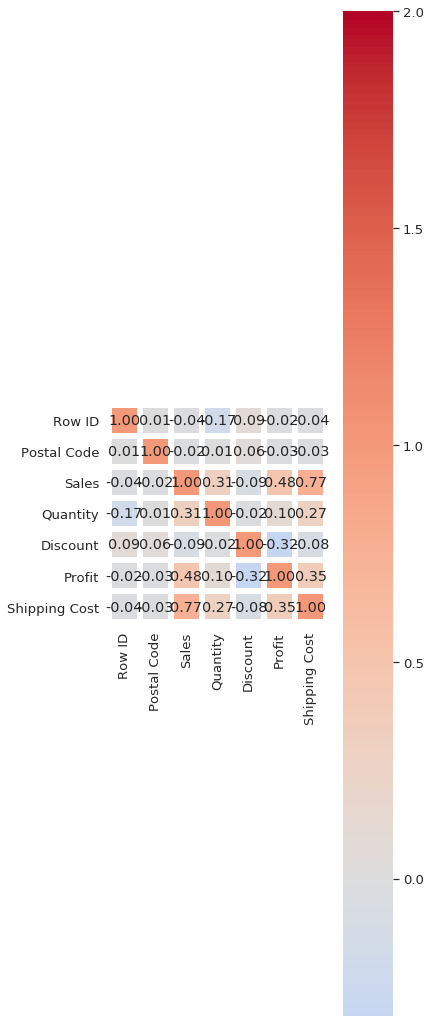

In [21]:
corr = df.corr()
g = sns.heatmap(corr, vmax=2, center=0, square=True, linewidths=5, cbar_kws={"shrink": 5}, annot= True, fmt='.2f', cmap='coolwarm')
sns.despine()


plt.show()


In [22]:
df = df.fillna(0)
result = associations(df, nominal_column= catcols, return_result=True)

NameError: ignored